In [2]:
#imports

import numpy as np
import matplotlib.pyplot as plt
import cv2

# Enable inline plotting
%matplotlib inline


In [ ]:
# Read and display the original image

im_path = "input/sample2.jpg"
img = cv2.imread(im_path)
print("Original image shape:", img.shape)

Original image shape: (1635, 736, 3)


Resized image shape: (800, 1000, 3)


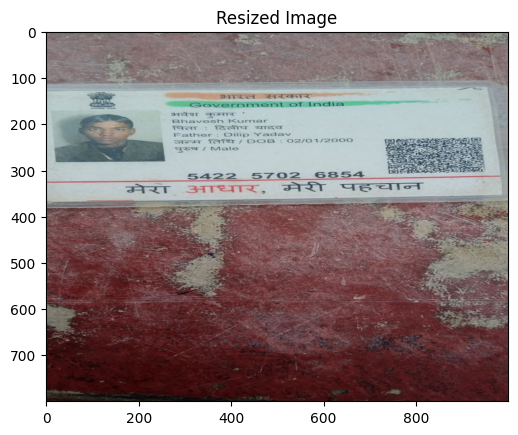

In [4]:
# Resize the image for easier processing and display

img = cv2.resize(img, (1000, 800))
print("Resized image shape:", img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.title("Resized Image")
plt.show()


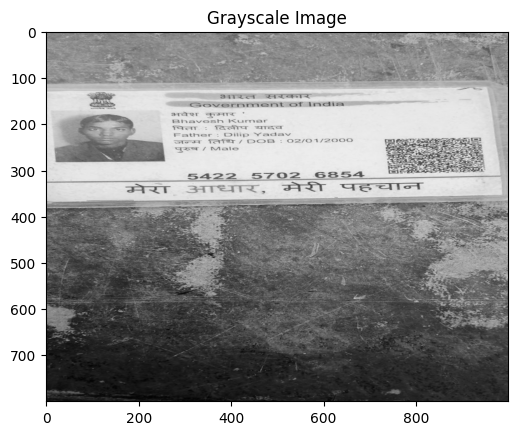

In [5]:
# Convert the image to grayscale and display it

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.show()

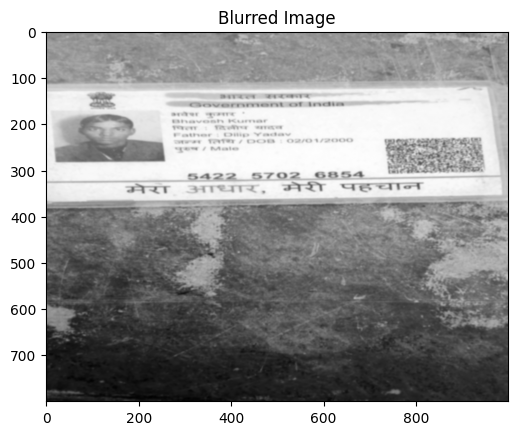

In [6]:
# Apply Gaussian Blur to the grayscale image to reduce noise

blurred = cv2.GaussianBlur(gray, (7, 7), 0)  # Larger kernel size
plt.imshow(blurred, cmap="gray")
plt.title("Blurred Image")
plt.show()

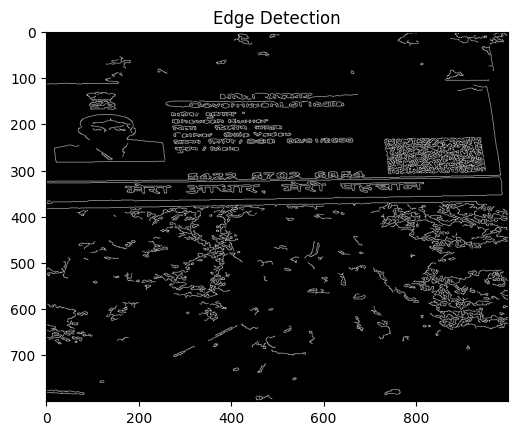

In [7]:
# Perform edge detection using the Canny algorithm and display the result

edge = cv2.Canny(blurred, 30, 100)  # Adjust thresholds
plt.imshow(edge, cmap="gray")
plt.title("Edge Detection")
plt.show()

In [16]:
# Extract contours from the edge-detected image

contours, _ = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours)}")

# Sort contours by area in descending order

contours = sorted(contours, key=cv2.contourArea, reverse=True)
print(f"Number of contours after sorting: {len(contours)}")

Number of contours found: 950
Number of contours after sorting: 950


In [17]:
# Select the largest contour that approximates to a quadrilateral

for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * p, True)
    if len(approx) == 4:
        target = approx
        break



In [18]:
# Check if a suitable contour was found

if target is not None:
    print(f"Target contour shape: {target.shape}")
else:
    print("No suitable contour found")


Target contour shape: (4, 1, 2)


In [19]:
# Function to reorder the contour points

def reorder(h):
    h = h.reshape((4, 2))
    hnew = np.zeros((4, 2), dtype=np.float32)

    add = h.sum(axis=1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h, axis=1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

Reordered points: [[425. 175.]
 [429. 175.]
 [429. 178.]
 [425. 178.]]


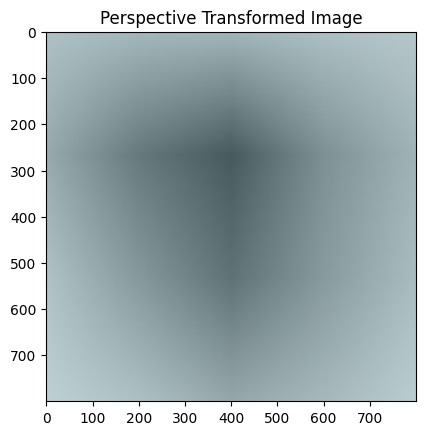

In [20]:
# Reorder the contour points for perspective transformation

if target is not None:
    target_reordered = reorder(target)
    print(f"Reordered points: {target_reordered}")

    # Perform perspective transformation

    input_representation = target_reordered.astype(np.float32)
    output_map = np.float32([[0, 0], [800, 0], [800, 800], [0, 800]])

    M = cv2.getPerspectiveTransform(input_representation, output_map)
    ans = cv2.warpPerspective(img, M, (800, 800))
    plt.imshow(cv2.cvtColor(ans, cv2.COLOR_BGR2RGB))
    plt.title("Perspective Transformed Image")
    plt.show()
else:
    ans = None
    print("Perspective transformation not applied due to missing contour")

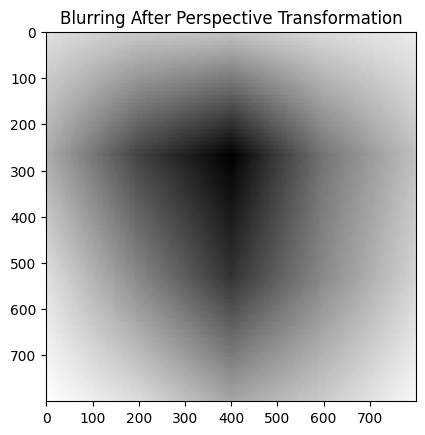

In [14]:
# Convert the perspective-transformed image to grayscale

if ans is not None:
    res = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to the transformed image

    b_res = cv2.GaussianBlur(res, (3, 3), 0)

    # Display the blurred transformed image

    plt.imshow(b_res, cmap='gray')
    plt.title("Blurring After Perspective Transformation")
    plt.show()
else:
    print("Skipping grayscale and blur steps due to missing transformed image")

In [15]:
# Save the transformed image
output_path = "transformed_document.jpg"
cv2.imwrite(output_path, b_res)

True

In [77]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [78]:
IMAGE_PATH = '/content/transformed_document.jpg'


In [79]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

[([[32, 84], [158, 84], [158, 120], [32, 120]], 'Tavolo:', 0.999806790087665),
 ([[169, 85], [213, 85], [213, 121], [169, 121]], '31', 0.7395062841865042),
 ([[169, 161], [351, 161], [351, 199], [169, 199]],
  'MARGHERITA',
  0.9999525384607199),
 ([[617, 157], [697, 157], [697, 197], [617, 197]],
  '6,00',
  0.9987761378288269),
 ([[171, 201], [317, 201], [317, 237], [171, 237]],
  'MARINARA',
  0.9999399399937867),
 ([[617, 195], [695, 195], [695, 237], [617, 237]], '4,50', 0.999961256980896),
 ([[171, 237], [435, 237], [435, 275], [171, 275]],
  'MONTANARINE ZPZ',
  0.7689787927075665),
 ([[615, 235], [695, 235], [695, 275], [615, 275]],
  '2,50',
  0.9999508857727051),
 ([[169, 275], [385, 275], [385, 313], [169, 313]],
  'SAN BERNARDO',
  0.9360249985864986),
 ([[395, 277], [453, 277], [453, 313], [395, 313]], 'NAT', 0.9837806220923937),
 ([[615, 273], [695, 273], [695, 313], [615, 313]],
  '2,50',
  0.9984407998911027),
 ([[100, 316], [124, 316], [124, 348], [100, 348]], '2', 0.9

In [80]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

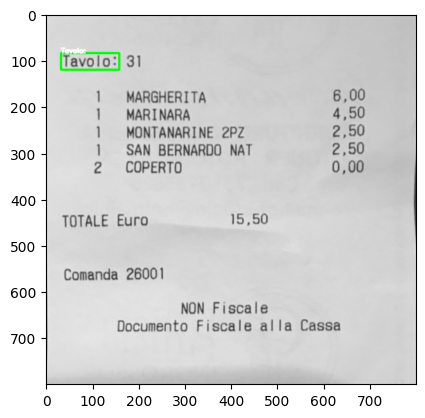

In [81]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

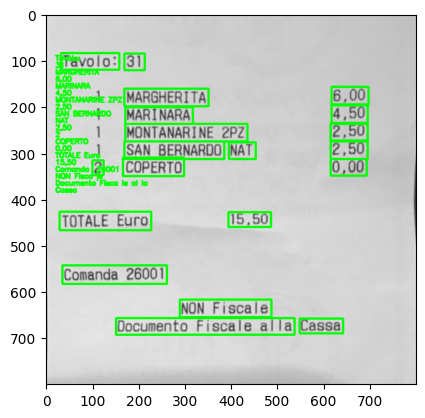

In [82]:
# List to store the detected text
detected_texts = []
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    # Append the detected text to the list
    detected_texts.append(text)
plt.imshow(img)
plt.show()

In [83]:
# Print the detected text line by line
print("Scanned Text:")
for line in detected_texts:
    print(line)

Scanned Text:
Tavolo:
31
MARGHERITA
6,00
MARINARA
4,50
MONTANARINE ZPZ
2,50
SAN BERNARDO
NAT
2,50
2
COPERTO
0,00
TOTALE Euro
15,50
Comanda  26001
NON Fisca |e
Documento Fisca le al Ia
Cassa


In [87]:
from googletrans import Translator

# Initialize the Translator
translator = Translator()


# Translate each line into Traditional Chinese
print("Translated Text to Chinese (Traditional):")
for line in detected_texts:
    translation = translator.translate(line, dest='zh-tw')
    print(translation.text)


Translated Text to Chinese (Traditional):
桌子：
31
瑪格麗塔
6,00
瑪麗納拉
4,50
登山ZPZ
2,50
聖貝爾納多
網路位址轉換
2,50
2
覆蓋
0,00
歐元總計
15,50
訂單 26001
不徵稅 |e
截至 Ia 的稅務文件
效益
